# Basic stats

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
import pandas as pd# Load the newly uploaded dataset
file_path = '1.0 SLR CFIR Thematic Analysis - FINAL.xlsx'
xls = pd.ExcelFile(file_path)

df1 = pd.read_excel('1.0 SLR CFIR Thematic Analysis - FINAL.xlsx')
df2 = pd.read_excel('2.0 SLR2 CFIR Thematic Analysis - FINAL.xlsx')
df = pd.concat([df1, df2], ignore_index=True)

# Load the 'Coded_data' sheet to examine its content
coded_data_df = pd.read_excel(xls, sheet_name='Coded_data')

# Display the basic information about the dataset
coded_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Article author    482 non-null    object
 1   Comments          482 non-null    object
 2   Barrier/enabler   482 non-null    object
 3   Domain            482 non-null    object
 4   CFIR Construct 1  482 non-null    object
dtypes: object(5)
memory usage: 19.0+ KB


C:\Users\ban146\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Barrier/enabler
Barrier    275
Enabler    207
Name: count, dtype: int64
Distinct Comments:  229
comments_with_both_tags Comments
Eligibility: In Australia, the MBS sets rules around how and when telehealth may be used, and for the billing item numbers that GPs may claim,1 both of which have been modified several times since their initial release in early 2020. These ever-changing rules have created confusion among GPs and patients. Participants mentioned that receptionists often acted as gatekeepers, needing to screen patients for eligibility and staying abreast of rules not necessarily evident in online booking systems. "â€¦if youâ€™re a new patient you canâ€™t go to any GP and ask for telehealth â€“ you have to have an established GP who youâ€™ve seen in the last 12 months. And if you look at MBS criteria for new patients for telehealth thereâ€™s about 10 different criteria that they have to either fit and itâ€™s impossible to screen people through these criteria and our receptionist

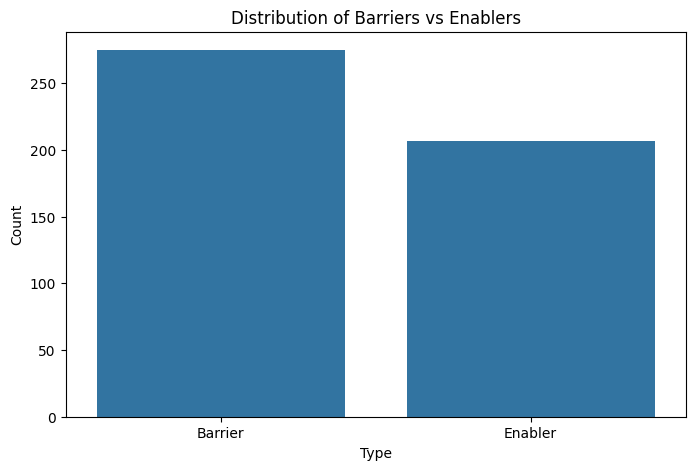

CFIR Construct 1
C. Innovation Relative Advantage              57
Accessibility                                 36
B. Capability                                 29
Suitability                                   27
A2. Information Technology Infrastructure     25
G. Innovation Design                          23
D. Motivation                                 22
F. Financing                                  20
E. Policies & Laws                            20
A3. Work Infrastructure                       16
K. Access to Knowledge & Information          14
C. Opportunity                                14
F1. Innovation Deliverers                     13
B. Relational Connections                     13
Preference                                    13
C. Local Conditions                           11
C. Communications                             10
D. Innovation Adaptability                    10
D. Partnerships & Connections                  8
F. Compatibility                               8
Gov

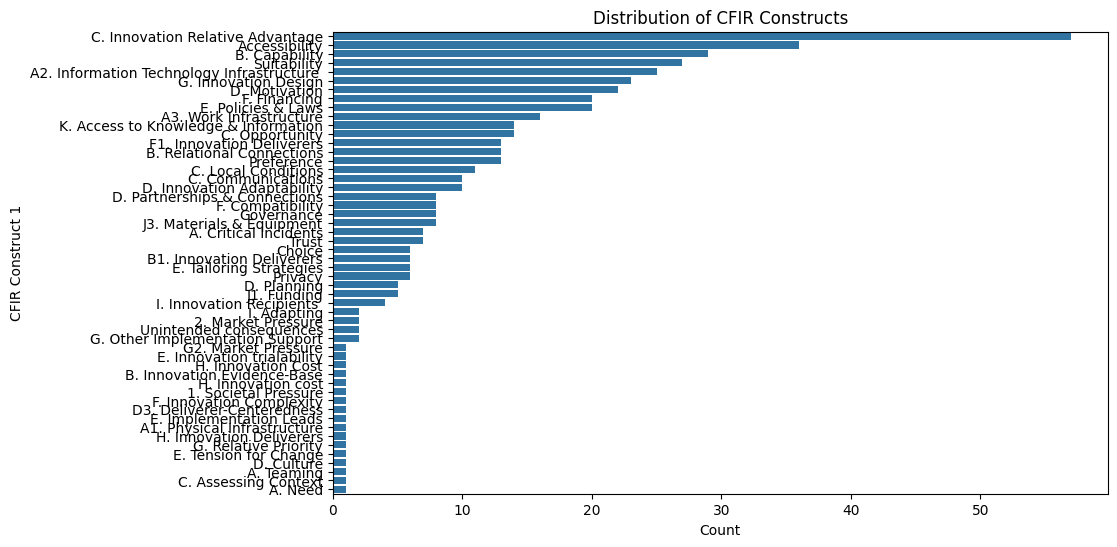

Domain
Innovation                200
Inner setting             104
Individuals                74
Outer setting              70
Implementation process     34
Name: count, dtype: int64


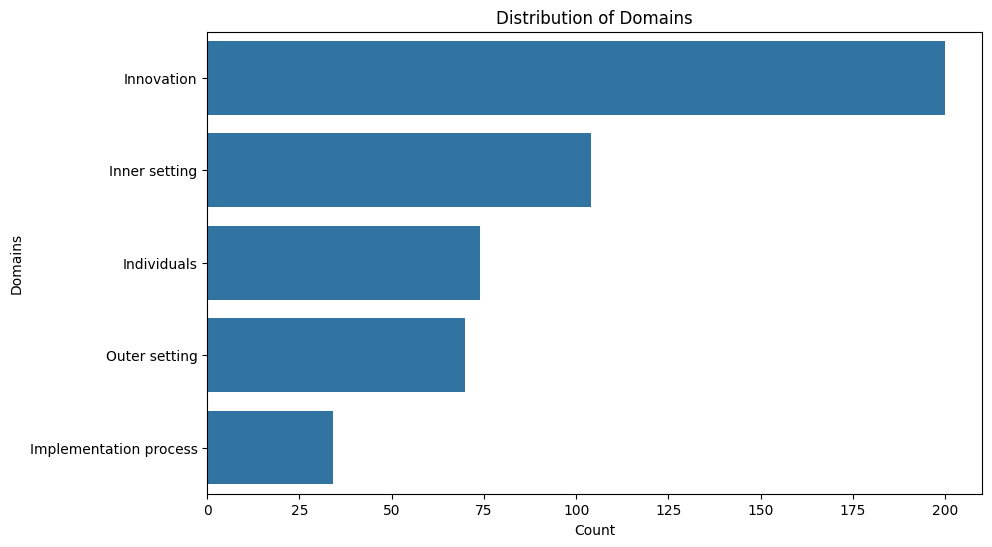

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
# Basic statistics for columns like "Barrier/enabler"
barrier_enabler_counts = coded_data_df['Barrier/enabler'].value_counts()
print(barrier_enabler_counts)
distinct_comments_count = coded_data_df['Comments'].nunique()


print("Distinct Comments: ", distinct_comments_count)
comment_tags = coded_data_df.groupby('Comments')['Barrier/enabler'].nunique()

# Count the number of comments that have both "Barrier" and "Enabler" tags
comments_with_both_tags = comment_tags[comment_tags > 1]
print("comments_with_both_tags", comments_with_both_tags)



# Plotting distribution of "Barrier/enabler"
plt.figure(figsize=(8, 5))
sns.barplot(x=barrier_enabler_counts.index, y=barrier_enabler_counts.values)
plt.title('Distribution of Barriers vs Enablers')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# CFIR Construct Analysis
cfir_construct_counts = coded_data_df['CFIR Construct 1'].value_counts().sort_values(ascending=False)
print(cfir_construct_counts)

# Plotting distribution of CFIR Constructs
plt.figure(figsize=(10, 6))
sns.barplot(x=cfir_construct_counts.values, y=cfir_construct_counts.index, orient='h')
plt.title('Distribution of CFIR Constructs')
plt.xlabel('Count')
plt.ylabel('CFIR Construct 1')
plt.show()

domain_counts = coded_data_df['Domain'].value_counts().sort_values(ascending=False)
print(domain_counts)

# Plotting distribution of CFIR Constructs
plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.values, y=domain_counts.index, orient='h')
plt.title('Distribution of Domains')
plt.xlabel('Count')
plt.ylabel('Domains')
plt.show()

# Word Frequency Analysis on "Comments"
# Combine all comments into one text
# all_comments = ' '.join(coded_data_df['Comments'].dropna().astype(str))

# # Remove special characters and tokenize
# words = re.findall(r'\b\w+\b', all_comments.lower())

# # Count word frequencies
# word_freq = Counter(words)

# # Get the most common words (excluding common stopwords for now)
# common_words = word_freq.most_common(20)
# print(common_words)

# # Plotting the most common words
# common_words_labels, common_words_values = zip(*common_words)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=list(common_words_labels), y=list(common_words_values))
# plt.title('Most Common Words in Comments')
# plt.xlabel('Word')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.show()


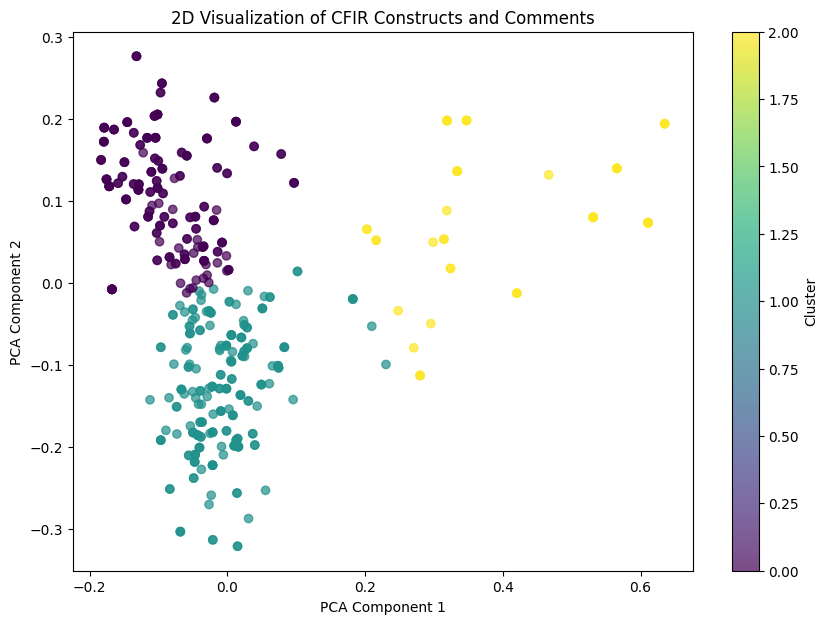

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Step 1: Analyze Domain and CFIR Construct Relationships
Create a crosstab to explore the relationships between 'Domain' and 'CFIR Construct 1'
domain_cfir_crosstab = pd.crosstab(coded_data_df['Domain'], coded_data_df['CFIR Construct 1'])

Plot the relationships using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(domain_cfir_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Relationships Between Domain and CFIR Construct 1')
plt.xlabel('CFIR Construct 1')
plt.ylabel('Domain')
plt.show()

# # Step 2: Clustering and Visualization
# # Using TF-IDF to convert the 'Comments' into numerical features
# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
# tfidf_matrix = tfidf_vectorizer.fit_transform(coded_data_df['Comments'].dropna())

# # Reduce the dimensions to 2D using PCA
# pca = PCA(n_components=2)
# comments_2d = pca.fit_transform(tfidf_matrix.toarray())

# # Perform KMeans clustering with 3 clusters (arbitrary choice)
# kmeans = KMeans(n_clusters=3, random_state=42)
# labels = kmeans.fit_predict(comments_2d)

# # Plotting the PCA results
# plt.figure(figsize=(10, 7))
# plt.scatter(comments_2d[:, 0], comments_2d[:, 1], c=labels, cmap='viridis', alpha=0.7)
# plt.title('2D Visualization of CFIR Constructs and Comments')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.colorbar(label='Cluster')
# plt.show()

# Barrier/Enabler vs CFIR constructs 

In [53]:
import pandas as pd

# Load the dataset
file_path = '1.0 SLR CFIR Thematic Analysis - FINAL.xlsx'
xls = pd.ExcelFile(file_path)
coded_data_df = pd.read_excel(xls, sheet_name='Coded_data')

# Filter relevant columns (assuming they are named 'Comments', 'Barrier/enabler', 'CFIR Construct 1', and 'Domain')
data = coded_data_df[['Comments', 'Barrier/enabler', 'CFIR Construct 1', 'Domain']]

# Data Cleaning: Drop NaN values and standardize text (lowercase for consistency)
data = data.dropna()
data['Barrier/enabler'] = data['Barrier/enabler'].str.lower()
data['CFIR Construct 1'] = data['CFIR Construct 1'].str.lower()
data['Domain'] = data['Domain'].str.lower()

# Display first few rows of the cleaned dataset
print(data.head())


                                            Comments Barrier/enabler  \
0  Project officers from Divisions where a provid...         barrier   
1  Project officers from Divisions where a provid...         barrier   
2  Project officers from Divisions where a provid...         barrier   
3  Project officers from Divisions where a provid...         barrier   
4  Project officers from Divisions where a provid...         barrier   

                       CFIR Construct 1         Domain  
0               a3. work infrastructure  inner setting  
1  k. access to knowledge & information  inner setting  
2             b. relational connections  inner setting  
3      c. innovation relative advantage     innovation  
4                            preference     innovation  


C:\Users\ban146\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


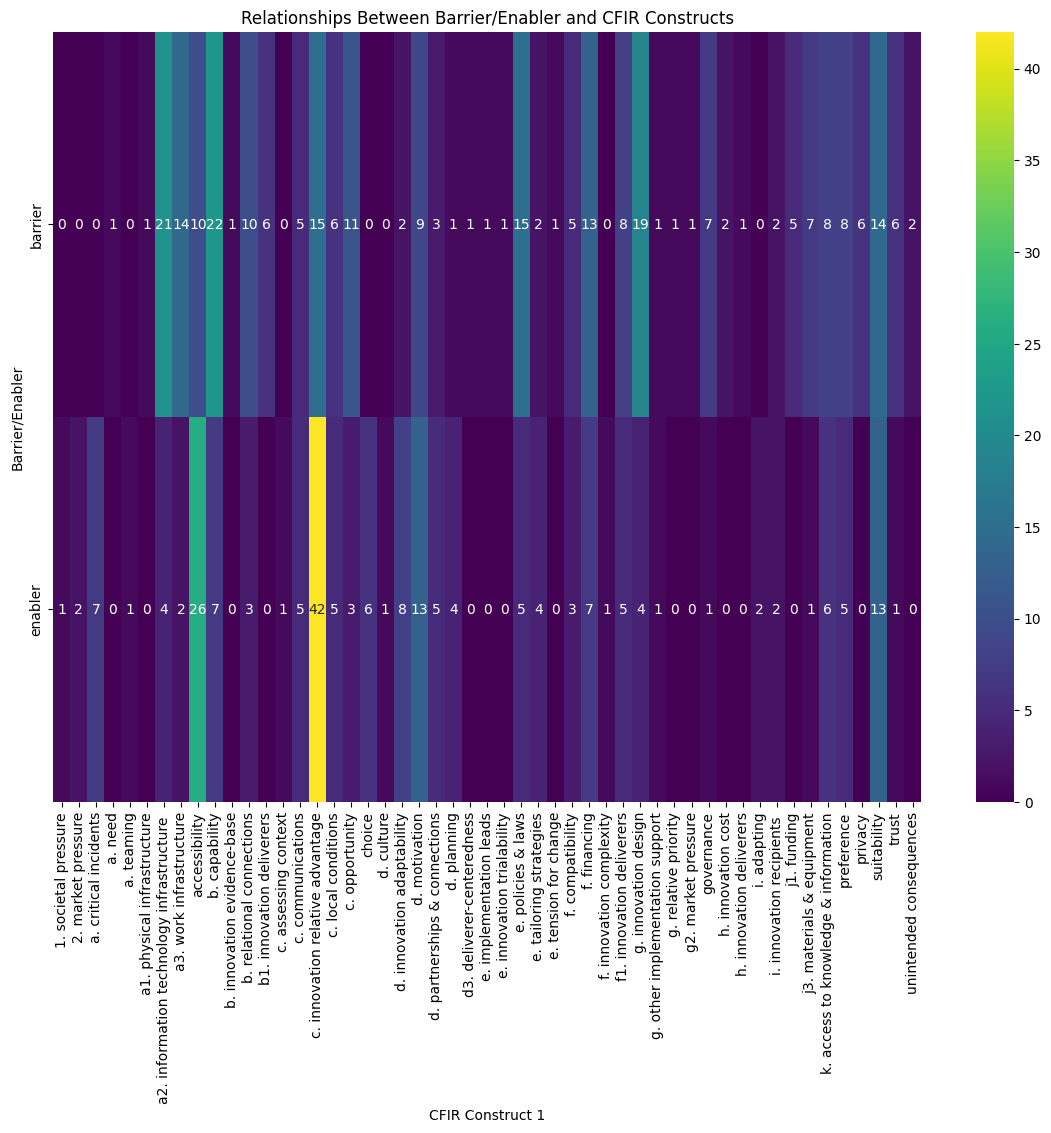

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab to explore relationships between 'Barrier/enabler' and 'CFIR Construct 1'
construct_crosstab = pd.crosstab(data['Barrier/enabler'], data['CFIR Construct 1'])

# Plot the relationships using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(construct_crosstab, annot=True, cmap='viridis', fmt='d')
plt.title('Relationships Between Barrier/Enabler and CFIR Constructs')
plt.xlabel('CFIR Construct 1')
plt.ylabel('Barrier/Enabler')
plt.show()


In [55]:
from scipy.stats import chi2_contingency

# Perform Chi-square test to determine if there's a significant relationship between 'Barrier/enabler' and 'CFIR Construct 1'
chi2, p, dof, expected = chi2_contingency(construct_crosstab)

# Display the p-value
print(f"Chi-square test p-value: {p}")

# If p-value < 0.05, we conclude that there is a significant relationship
if p < 0.05:
    print("There is a significant relationship between Barrier/Enabler and CFIR Constructs.")
else:
    print("There is no significant relationship between Barrier/Enabler and CFIR Constructs.")


Chi-square test p-value: 1.1106345586457305e-10
There is a significant relationship between Barrier/Enabler and CFIR Constructs.


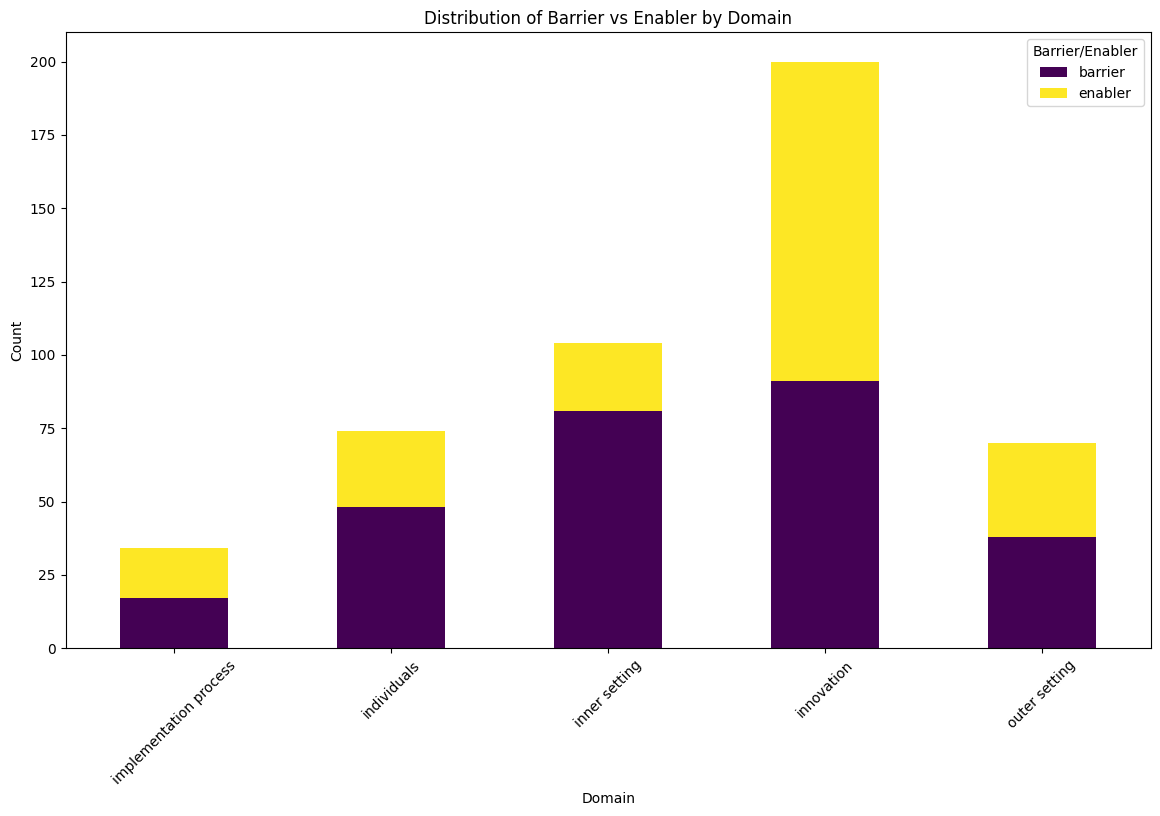

In [56]:
# Create a crosstab to explore relationships between 'Domain' and 'Barrier/enabler'
domain_crosstab = pd.crosstab(data['Domain'], data['Barrier/enabler'])

# Plot the relationships using a barplot
domain_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Barrier vs Enabler by Domain')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Barrier/Enabler')
plt.show()


# XGBoost Model

In [67]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '1.0 SLR CFIR Thematic Analysis - FINAL.xlsx'
xls = pd.ExcelFile(file_path)
coded_data_df = pd.read_excel(xls, sheet_name='Coded_data')

# Filter relevant columns and clean data
data = coded_data_df[['Comments', 'Barrier/enabler', 'CFIR Construct 1']].dropna()

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.lower()

# Apply preprocessing to the comments
data['Comments'] = data['Comments'].apply(preprocess_text)

# Label encoding for 'Barrier/enabler' and 'CFIR Construct 1'
label_encoder_barrier = LabelEncoder()
data['Barrier/enabler'] = label_encoder_barrier.fit_transform(data['Barrier/enabler'])  # Encodes 'Barrier' as 0 and 'Enabler' as 1

label_encoder_construct = LabelEncoder()
data['CFIR Construct 1'] = label_encoder_construct.fit_transform(data['CFIR Construct 1'])

# Splitting the data into train and test sets for Barrier/Enabler and CFIR Construct
X = data['Comments']
y_barrier = data['Barrier/enabler']
y_construct = data['CFIR Construct 1']

X_train, X_test, y_train_barrier, y_test_barrier = train_test_split(X, y_barrier, test_size=0.2, random_state=42)
_, _, y_train_construct, y_test_construct = train_test_split(X, y_construct, test_size=0.2, random_state=42)


C:\Users\ban146\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost Classifier for Barrier/Enabler prediction
xgb_classifier_barrier = XGBClassifier(objective='binary:logistic', n_estimators=10000, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_classifier_barrier.fit(X_train_tfidf, y_train_barrier)

# Make predictions on the test set
y_pred_barrier = xgb_classifier_barrier.predict(X_test_tfidf)

# Evaluate the model
print("Barrier/Enabler Classification Report:")
print(classification_report(y_test_barrier, y_pred_barrier))
print(f"Accuracy Score: {accuracy_score(y_test_barrier, y_pred_barrier)}")


Barrier/Enabler Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        47
           1       0.87      0.78      0.82        50

    accuracy                           0.82        97
   macro avg       0.83      0.83      0.82        97
weighted avg       0.83      0.82      0.82        97

Accuracy Score: 0.8247422680412371


In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD

# Step 1: Load the dataset
df1 = pd.read_excel('1.0 SLR CFIR Thematic Analysis - FINAL.xlsx')
df2 = pd.read_excel('2.0 SLR2 CFIR Thematic Analysis - FINAL.xlsx')
df = pd.concat([df1, df2], ignore_index=True)

# Assuming the dataset has two columns: 'Comment' (text) and 'Domain' (label)
comments = df['Comments']
domains = df['Domain']

# Step 2: Preprocessing the text data
# Convert text to TF-IDF features with n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=10000)
X = tfidf_vectorizer.fit_transform(comments)

# Step 3: Encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(domains)

# Step 4: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Dimensionality reduction (Optional, can improve performance)
svd = TruncatedSVD(n_components=500)
X_reduced = svd.fit_transform(X_resampled)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_resampled, test_size=0.2, random_state=42)

# Step 7: Train the XGBoost model with hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [500],
    'min_child_weight': [1, 5, 10]
}

xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_class=len(label_encoder.classes_), eval_metric='mlogloss')

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 8: Make predictions
y_pred = np.argmax(best_model.predict_proba(X_test), axis=1)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optional: Save the model and vectorizer for future use
import joblib
joblib.dump(best_model, 'xgboost_cfir_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


C:\Users\ban146\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\ban146\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

# LSTM Model Domain

In [25]:
#needs libraries to be downloaded to work 
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, Dataset
from sklearn.utils.class_weight import compute_class_weight

# Step 1: Load the dataset
df = pd.read_excel('1.0 SLR CFIR Thematic Analysis - FINAL.xlsx')

# Assuming the dataset has two columns: 'Comment' (text) and 'Domain' (label)
comments = df['Comments']
domains = df['Domain']

# Step 2: Preprocessing the text data
# Tokenize text and create vocabulary
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')
vocab = torchtext.vocab.build_vocab_from_iterator(map(tokenizer, comments), specials=['<unk>', '<pad>'])
vocab.set_default_index(vocab['<unk>'])

# Convert text to sequences
max_len = 100
X = [vocab.lookup_indices(tokenizer(text))[:max_len] for text in comments]
X = [seq + [vocab['<pad>']] * (max_len - len(seq)) if len(seq) < max_len else seq for seq in X]

# Step 3: Encoding the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(domains)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a custom dataset class
class CommentsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CommentsDataset(X_train, y_train)
test_dataset = CommentsDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 6: Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = torch.tensor(class_weights, dtype=torch.float)

# Step 7: Build the LSTM model using PyTorch
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab['<pad>'])
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        x = hidden[-1]
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Model parameters
vocab_size = len(vocab)
embedding_dim = 128
hidden_dim = 64
output_dim = len(label_encoder.classes_)

# Initialize the model, loss function, and optimizer
model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 8: Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(10):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}')

# Step 9: Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.numpy())

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Optional: Save the model and vectorizer for future use
torch.save(model.state_dict(), 'lstm_cfir_model.pth')
import joblib
joblib.dump(vocab, 'vocab.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


C:\Users\ban146\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


NameError: name 'torchtext' is not defined